<a href="https://colab.research.google.com/github/PriyathamVarma/machine-learning-leeds/blob/main/Copy_of_Leeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Visualization** - A Machine Learning approach for heart attack prediction

# This dataset contains information like age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal and the target that we acheive at the end as a result.

In [ ]:
# Imputation - if null values exit then we have to perform imputation to fill the missing values
# categorical encoding - if any categorical attributes are present, then we have to employ this.
# one hot encoder - to encode values
# feature scaling - normalisation or standardisation
# Correlations - 0.2 to 0.8

In [18]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import sklearn as skl
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score

In [1]:
path = "https://raw.githubusercontent.com/PriyathamVarma/machine-learning-leeds/main/DiabetesClassificationDataset2022%20(2).csv"

In [6]:
df = pd.read_csv(path)


In [5]:
df

,encounter_id,hospital_id,gender,ethnicity,age,elective_surgery,height,weight,bmi,readmission_status,...,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
0,214826,118,M,Caucasian,68.0,0,180.3,73.9,22.732803,0,...,40.0,0,0,0,0,0,0,0,0,1
1,276985,118,F,Caucasian,25.0,0,172.7,95.3,31.952749,0,...,68.0,0,0,0,0,0,0,0,0,0
2,262220,118,F,Caucasian,81.0,1,165.1,61.7,22.635548,0,...,60.0,0,0,0,0,0,0,0,1,0
3,201746,33,M,Caucasian,19.0,0,188.0,NaN,NaN,0,...,103.0,0,0,0,0,0,0,0,0,0
4,246060,81,F,Caucasian,77.0,0,160.0,70.2,27.421875,0,...,46.0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79154,166024,146,F,Caucasian,86.0,0,167.6,86.2,30.687339,0,...,137.0,0,0,0,0,0,0,0,0,0
79155,185015,154,F,Caucasian,55.0,0,165.1,91.7,33.641487,0,...,59.0,0,0,0,1,0,0,1,0,0
79156,173688,47,M,African American,61.0,0,173.0,88.1,29.436333,0,...,173.0,0,0,0,0,0,0,0,0,0
79157,169835,120,M,Caucasian,80.0,0,175.0,84.8,27.689796,0,...,54.0,0,0,0,1,0,0,0,0,0


In [7]:
df.style.background_gradient(cmap="Blues")

KeyboardInterrupt: ignored

# y = f(x,x1,x2,x3,.......)
# Here, "x" is an independent variable and "y" is a dependent variable on x,x1,x2,x3,.....

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79159 entries, 0 to 79158
Data columns (total 88 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   encounter_id                 79159 non-null  int64  
 1   hospital_id                  79159 non-null  int64  
 2   gender                       79129 non-null  object 
 3   ethnicity                    78198 non-null  object 
 4   age                          76317 non-null  float64
 5   elective_surgery             79159 non-null  int64  
 6   height                       77978 non-null  float64
 7   weight                       77086 non-null  float64
 8   bmi                          76468 non-null  float64
 9   readmission_status           79159 non-null  int64  
 10  icu_type                     79159 non-null  object 
 11  h1_temp_max                  61223 non-null  float64
 12  h1_temp_min                  61223 non-null  float64
 13  d1_albumin_max  

In [9]:
df.describe()

,encounter_id,hospital_id,age,elective_surgery,height,weight,bmi,readmission_status,h1_temp_max,h1_temp_min,...,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
count,79159.000000,79159.000000,76317.000000,79159.000000,77978.000000,77086.000000,76468.000000,79159.0,61223.000000,61223.000000,...,78931.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000
mean,212863.726740,106.188620,62.452389,0.189404,169.565316,85.114552,29.600786,0.0,36.721315,36.612966,...,87.278128,0.000834,0.016713,0.013744,0.025379,0.007327,0.004080,0.020781,0.332243,0.355639
std,38113.816591,63.776527,16.446715,0.391831,10.835017,25.465505,8.487987,0.0,0.771686,0.795767,...,42.058748,0.028863,0.128195,0.116429,0.157275,0.085284,0.063748,0.142651,0.471020,0.478709
min,147001.000000,1.000000,0.000000,0.000000,137.200000,38.600000,14.844926,0.0,33.400000,32.900000,...,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,179772.000000,49.000000,53.000000,0.000000,162.500000,67.700000,23.875433,0.0,36.400000,36.300000,...,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,212864.000000,112.000000,65.000000,0.000000,170.000000,81.600000,28.029903,0.0,36.700000,36.700000,...,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,245812.000000,165.000000,75.000000,0.000000,177.800000,98.400000,33.420162,0.0,37.100000,37.000000,...,124.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,278997.000000,204.000000,89.000000,1.000000,195.590000,186.000000,67.814990,0.0,39.500000,39.300000,...,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.isnull().sum()

encounter_id                      0
hospital_id                       0
gender                           30
ethnicity                       961
age                            2842
                               ... 
leukemia                          0
lymphoma                          0
solid_tumor_with_metastasis       0
ventilated_apache                 0
diabetes_mellitus                 0
Length: 88, dtype: int64

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


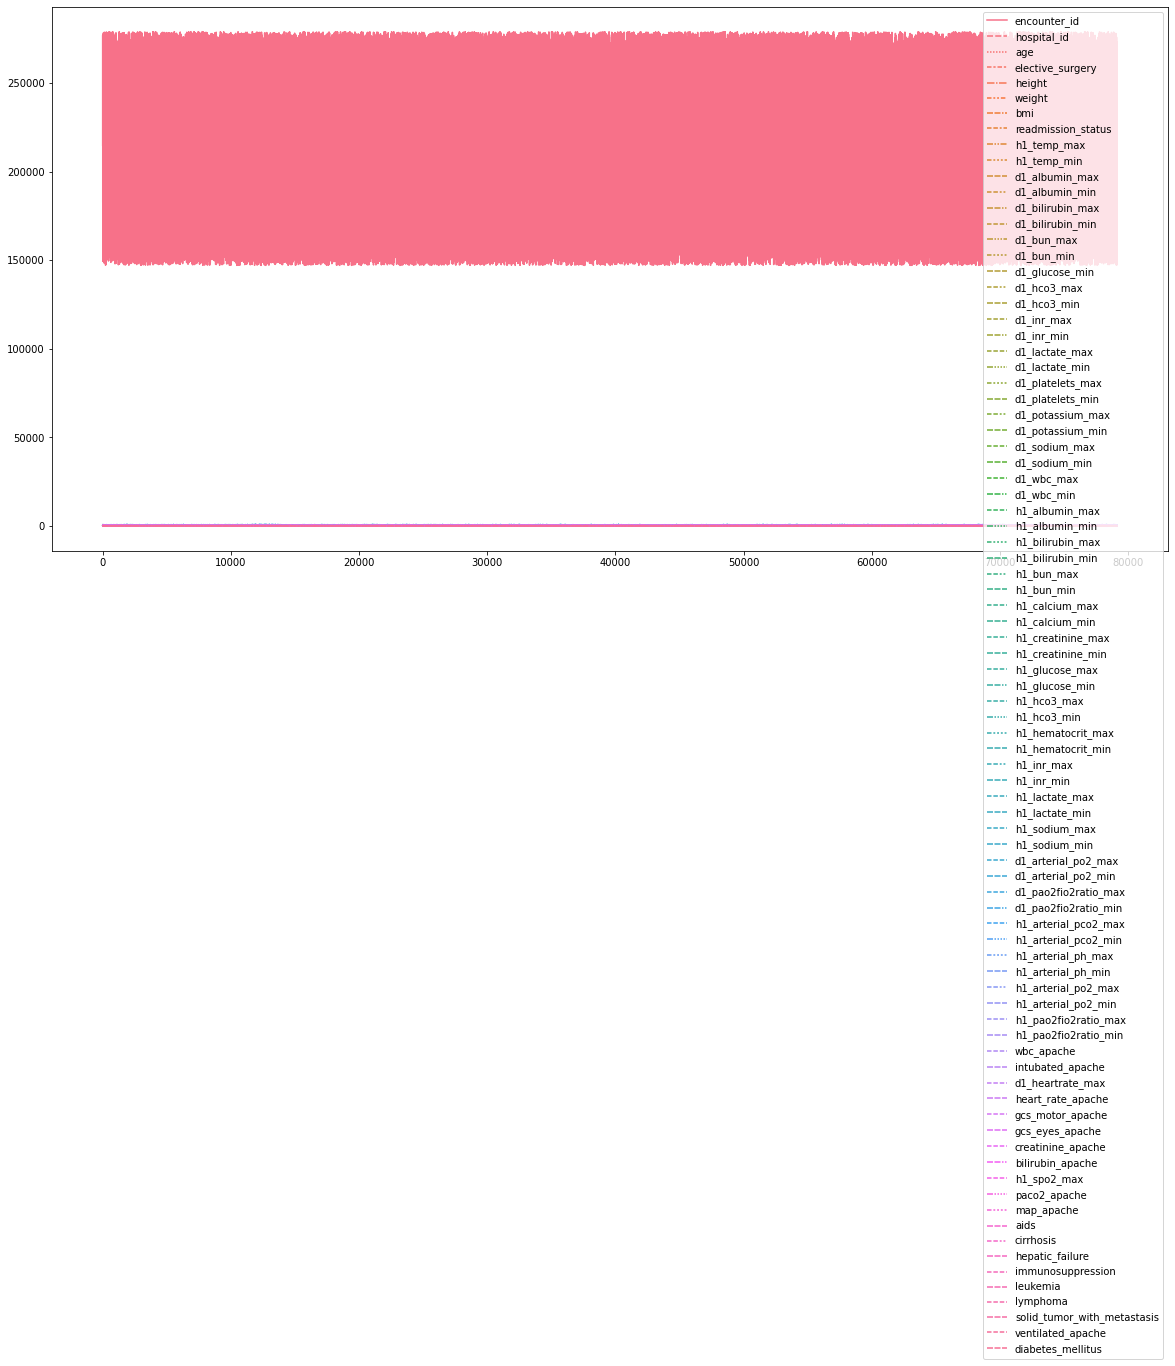

In [11]:
plt.figure(figsize=(20,10))
sns.lineplot(data = df)
plt.show()


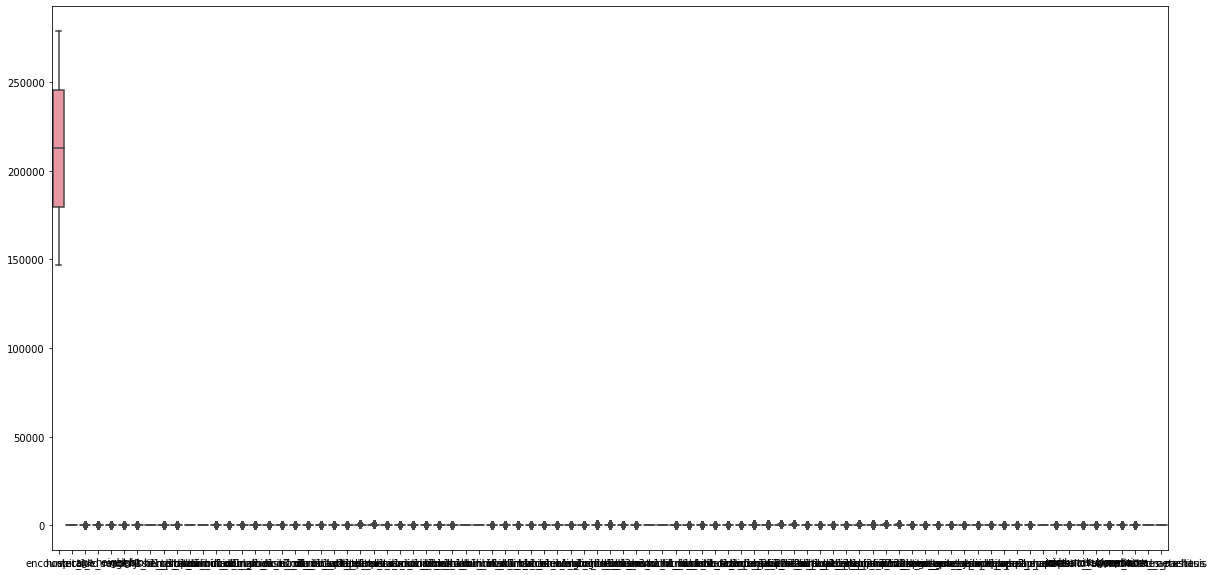

In [12]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df)
plt.show()

In [13]:
plt.figure(figsize=(20,10))
sns.relplot(data = df)
plt.show()

<Figure size 1440x720 with 0 Axes>

KeyboardInterrupt: ignored

In [30]:
df.describe()

,encounter_id,hospital_id,age,elective_surgery,height,weight,bmi,readmission_status,h1_temp_max,h1_temp_min,...,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
count,79159.000000,79159.000000,76317.000000,79159.000000,77978.000000,77086.000000,76468.000000,79159.0,61223.000000,61223.000000,...,78931.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000
mean,212863.726740,106.188620,62.452389,0.189404,169.565316,85.114552,29.600786,0.0,36.721315,36.612966,...,87.278128,0.000834,0.016713,0.013744,0.025379,0.007327,0.004080,0.020781,0.332243,0.355639
std,38113.816591,63.776527,16.446715,0.391831,10.835017,25.465505,8.487987,0.0,0.771686,0.795767,...,42.058748,0.028863,0.128195,0.116429,0.157275,0.085284,0.063748,0.142651,0.471020,0.478709
min,147001.000000,1.000000,0.000000,0.000000,137.200000,38.600000,14.844926,0.0,33.400000,32.900000,...,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,179772.000000,49.000000,53.000000,0.000000,162.500000,67.700000,23.875433,0.0,36.400000,36.300000,...,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,212864.000000,112.000000,65.000000,0.000000,170.000000,81.600000,28.029903,0.0,36.700000,36.700000,...,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,245812.000000,165.000000,75.000000,0.000000,177.800000,98.400000,33.420162,0.0,37.100000,37.000000,...,124.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,278997.000000,204.000000,89.000000,1.000000,195.590000,186.000000,67.814990,0.0,39.500000,39.300000,...,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
#Dropping features with more than 50% values
null_values = df.isna().sum()
df.isna().mean().sort_values(ascending=False)

h1_bilirubin_min      0.920287
h1_bilirubin_max      0.920287
h1_albumin_min        0.912985
h1_albumin_max        0.912985
h1_lactate_min        0.909372
                        ...   
hospital_id           0.000000
icu_type              0.000000
readmission_status    0.000000
elective_surgery      0.000000
diabetes_mellitus     0.000000
Length: 88, dtype: float64

In [34]:
limit_value = 0.50 * len(df)
limit_value

39579.5

In [36]:
# Cleaning data which contains 50% null values in a data field using logical indexing
cleaned_data = df[df.columns[null_values < limit_value]]
cleaned_data.shape

(79159, 44)

In [45]:
cleaned_data.describe()
cleaned_data.isna().mean().sort_values(ascending=False)

h1_temp_max                    0.226582
h1_temp_min                    0.226582
wbc_apache                     0.224245
creatinine_apache              0.184237
d1_hco3_min                    0.150343
d1_hco3_max                    0.150343
d1_platelets_max               0.141058
d1_platelets_min               0.141058
d1_wbc_min                     0.132379
d1_wbc_max                     0.132379
d1_bun_max                     0.099925
d1_bun_min                     0.099925
d1_sodium_min                  0.096199
d1_sodium_max                  0.096199
d1_potassium_max               0.090792
d1_potassium_min               0.090792
d1_glucose_min                 0.055066
h1_spo2_max                    0.048055
age                            0.035902
bmi                            0.033995
weight                         0.026188
gcs_eyes_apache                0.015463
gcs_motor_apache               0.015463
height                         0.014919
ethnicity                      0.012140


In [48]:
#Imputation using TransformerMixing
#imputing lab style
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):
        # Find most common value with value_counts() which returns 
        # counts in descending order so that the first element is the most frequently-occurring element.
        self.fill = pd.Series([X[c].value_counts().index[0]
            #Use that if type is object otherwise use mean                   
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)


#Define the data to be filled as X, we can pass the whole data frame and apply our new class
X = cleaned_data
xt = DataFrameImputer().fit_transform(X)

print('before...')
#Let us see missing value for the train data before
missing_val_count_by_column = (X.isnull().sum())
print('Missing columns for the data:\n',missing_val_count_by_column[missing_val_count_by_column>0])

#and after
print('after...')
missing_val_count_by_column = (xt.isnull().sum())
print('Missing columns for the data:\n',missing_val_count_by_column[missing_val_count_by_column>0])

table = missing_val_count_by_column[missing_val_count_by_column>0]

before...
Missing columns for the data:
 gender                  30
ethnicity              961
age                   2842
height                1181
weight                2073
bmi                   2691
h1_temp_max          17936
h1_temp_min          17936
d1_bun_max            7910
d1_bun_min            7910
d1_glucose_min        4359
d1_hco3_max          11901
d1_hco3_min          11901
d1_platelets_max     11166
d1_platelets_min     11166
d1_potassium_max      7187
d1_potassium_min      7187
d1_sodium_max         7615
d1_sodium_min         7615
d1_wbc_max           10479
d1_wbc_min           10479
wbc_apache           17751
d1_heartrate_max       145
heart_rate_apache      156
gcs_motor_apache      1224
gcs_eyes_apache       1224
creatinine_apache    14584
h1_spo2_max           3804
map_apache             228
dtype: int64
after...
Missing columns for the data:
 Series([], dtype: int64)


In [50]:
#describing imputed data
imputed_data_frame = xt
imputed_data_frame.describe()

,encounter_id,hospital_id,age,elective_surgery,height,weight,bmi,readmission_status,h1_temp_max,h1_temp_min,...,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
count,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.0,79159.000000,79159.000000,...,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000
mean,212863.726740,106.188620,62.452389,0.189404,169.565316,85.114552,29.600786,0.0,36.721315,36.612966,...,87.278128,0.000834,0.016713,0.013744,0.025379,0.007327,0.004080,0.020781,0.332243,0.355639
std,38113.816591,63.776527,16.148774,0.391831,10.753886,25.129846,8.342464,0.0,0.678651,0.699829,...,41.998134,0.028863,0.128195,0.116429,0.157275,0.085284,0.063748,0.142651,0.471020,0.478709
min,147001.000000,1.000000,0.000000,0.000000,137.200000,38.600000,14.844926,0.0,33.400000,32.900000,...,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,179772.000000,49.000000,53.000000,0.000000,162.560000,68.000000,24.047503,0.0,36.500000,36.400000,...,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,212864.000000,112.000000,64.000000,0.000000,170.000000,81.800000,28.326580,0.0,36.721315,36.612966,...,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,245812.000000,165.000000,75.000000,0.000000,177.800000,97.800000,33.183055,0.0,36.900000,36.880000,...,124.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,278997.000000,204.000000,89.000000,1.000000,195.590000,186.000000,67.814990,0.0,39.500000,39.300000,...,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
#encoding categorical data
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
#encoding
import category_encoders as ce

#We establish the Ordinal encoder which will convert each categorical label to a number
# We specify the columns we want to transform, we ask it to handle missing values if any and also to return a dataframe instead of an np array
enc = ce.OrdinalEncoder(cols=imputed_data_frame.columns,handle_missing='return_nan',return_df= True)

#We now fit the model and transform the data and put it in X which is a dataframe
categorical_encoded_data=enc.fit_transform(imputed_data_frame)
categorical_encoded_data.head(10)
#categorical_encoded_data.select_dtypes(include="object").describe()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,encounter_id,hospital_id,gender,ethnicity,age,elective_surgery,height,weight,bmi,readmission_status,...,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
2,3.0,1.0,2.0,1.0,3.0,2.0,3.0,3.0,3.0,1.0,...,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0
3,4.0,2.0,1.0,1.0,4.0,1.0,4.0,4.0,4.0,1.0,...,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
4,5.0,3.0,2.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,...,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
5,6.0,4.0,1.0,1.0,6.0,1.0,6.0,6.0,6.0,1.0,...,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,7.0,4.0,2.0,1.0,7.0,1.0,3.0,7.0,7.0,1.0,...,7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
7,8.0,1.0,2.0,1.0,8.0,1.0,5.0,4.0,4.0,1.0,...,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,9.0,1.0,1.0,1.0,9.0,1.0,7.0,8.0,8.0,1.0,...,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,10.0,1.0,2.0,1.0,10.0,2.0,5.0,4.0,4.0,1.0,...,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0


In [56]:
categorical_encoded_data

,encounter_id,hospital_id,gender,ethnicity,age,elective_surgery,height,weight,bmi,readmission_status,...,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
2,3.0,1.0,2.0,1.0,3.0,2.0,3.0,3.0,3.0,1.0,...,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0
3,4.0,2.0,1.0,1.0,4.0,1.0,4.0,4.0,4.0,1.0,...,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
4,5.0,3.0,2.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,...,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79154,79152.0,126.0,2.0,1.0,47.0,1.0,11.0,85.0,7071.0,1.0,...,12.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
79155,79153.0,169.0,2.0,1.0,32.0,1.0,3.0,644.0,11899.0,1.0,...,28.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0
79156,79154.0,118.0,1.0,2.0,24.0,1.0,24.0,55.0,23863.0,1.0,...,100.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
79157,79155.0,148.0,1.0,1.0,9.0,1.0,22.0,86.0,4600.0,1.0,...,65.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0


In [57]:
#oulier detection
#imported the implementation of this algorihm from sklearn
from sklearn.ensemble import IsolationForest

#Use the algorithm for outlier detection, then use it to predict each point
#Any point labelled as -1 is an outlier
clf = IsolationForest(max_samples=len(categorical_encoded_data), random_state = 100, contamination= "auto")
preds = clf.fit_predict(categorical_encoded_data)
#print(preds)
totalOutliers=0
for pred in preds:
    if pred == -1:
        totalOutliers=totalOutliers+1
print("Total number of outliers identified is: ",totalOutliers)
outliers_percentage = round((totalOutliers/len(categorical_encoded_data)*100),2)
print("Total percentage of outliers identified is: ", outliers_percentage ,"%")

Total number of outliers identified is:  922
Total percentage of outliers identified is:  1.16 %


In [77]:

cleared_data = categorical_encoded_data.drop(columns = ['readmission_status','hospital_id','encounter_id'])
cleared_data.columns

Index(['gender', 'ethnicity', 'age', 'elective_surgery', 'height', 'weight',
       'bmi', 'icu_type', 'h1_temp_max', 'h1_temp_min', 'd1_bun_max',
       'd1_bun_min', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min',
       'd1_platelets_max', 'd1_platelets_min', 'd1_potassium_max',
       'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max',
       'd1_wbc_min', 'wbc_apache', 'intubated_apache', 'd1_heartrate_max',
       'heart_rate_apache', 'gcs_motor_apache', 'gcs_eyes_apache',
       'creatinine_apache', 'h1_spo2_max', 'map_apache', 'aids', 'cirrhosis',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'ventilated_apache',
       'diabetes_mellitus'],
      dtype='object')

In [78]:
# Correlation
correlation_viz_data = cleared_data.corr().style.background_gradient(cmap="Blues")
correlation_viz_data

,gender,ethnicity,age,elective_surgery,height,weight,bmi,icu_type,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,wbc_apache,intubated_apache,d1_heartrate_max,heart_rate_apache,gcs_motor_apache,gcs_eyes_apache,creatinine_apache,h1_spo2_max,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
gender,1.000000,-0.005783,-0.003809,-0.022821,0.029790,0.065042,0.006070,-0.025431,0.000194,-0.001170,-0.010670,-0.010060,0.009462,0.012640,0.015478,0.028752,0.020734,-0.002024,0.009701,0.004128,0.002525,0.000741,-0.001012,-0.005602,-0.033683,0.000324,-0.001369,-0.004029,-0.019917,0.031898,-0.007159,-0.004344,-0.018622,-0.017269,-0.018248,0.006423,-0.012001,0.006850,0.005044,-0.021256,0.008113
ethnicity,-0.005783,1.000000,0.064058,-0.015444,0.000125,-0.015773,-0.032894,-0.014399,-0.035053,-0.037226,0.019312,0.015145,0.013299,-0.040718,-0.037593,0.010842,0.009542,0.012706,0.005354,0.007546,0.007825,-0.049078,-0.050213,-0.041428,0.006846,-0.005154,-0.008791,0.016493,0.011917,0.050418,-0.034642,0.007876,0.008075,0.023736,0.013710,-0.006752,-0.001266,-0.007237,-0.012108,-0.012237,-0.048710
age,-0.003809,0.064058,1.000000,-0.060571,0.000318,-0.002181,0.022637,-0.020549,0.005508,0.001708,-0.018381,-0.032134,-0.020945,-0.003877,0.007275,0.000337,0.000763,-0.013550,-0.019839,-0.014977,-0.012387,0.001221,0.000277,-0.001299,-0.016221,0.006377,0.009435,0.004727,0.017413,0.013486,-0.028271,0.015690,0.022924,0.010029,0.004004,-0.023116,-0.016261,-0.012683,-0.028375,-0.040504,0.085373
elective_surgery,-0.022821,-0.015444,-0.060571,1.000000,0.017733,0.007169,0.020976,0.103644,0.006750,0.019065,-0.081832,-0.093341,-0.029874,-0.023468,-0.035934,0.003502,0.019169,-0.019636,-0.033848,-0.030033,-0.043422,-0.017631,-0.030506,-0.006408,0.171894,-0.045187,-0.039948,-0.056038,-0.036876,-0.046892,-0.092308,-0.010848,-0.009495,-0.029320,-0.032419,-0.013430,-0.015444,-0.006665,0.016144,0.151935,0.006135
height,0.029790,0.000125,0.000318,0.017733,1.000000,0.059092,0.271803,0.027876,0.022122,0.024929,-0.007471,-0.006964,0.009222,0.029100,0.023391,0.003029,0.002354,0.000760,-0.001443,0.006246,0.009069,-0.005146,-0.006184,-0.014893,0.018381,0.004264,0.008977,0.021950,0.017466,-0.011053,0.012992,-0.004693,0.007590,0.004552,0.001783,-0.001633,-0.005122,-0.002035,0.000153,0.014855,0.020865
weight,0.065042,-0.015773,-0.002181,0.007169,0.059092,1.000000,0.334331,0.018450,0.009059,0.009128,0.004607,0.008042,0.003548,0.006620,0.007818,0.013213,0.007975,0.002270,0.014229,0.006926,0.008705,0.067880,0.070052,0.066430,0.004803,0.007838,0.005381,-0.000552,-0.010964,0.020903,0.001202,0.001226,0.000078,0.001493,0.005034,0.017321,-0.003827,-0.000345,0.010954,0.007260,0.028240
bmi,0.006070,-0.032894,0.022637,0.020976,0.271803,0.334331,1.000000,0.031484,0.029998,0.030733,-0.007255,-0.013063,-0.045697,0.021877,0.018965,0.017295,0.018073,-0.009804,-0.006965,0.010006,0.013373,0.054932,0.052299,0.048670,0.007338,0.010801,0.016338,0.011018,0.001907,-0.007877,0.014135,-0.002322,0.011600,-0.009158,-0.004892,0.008438,-0.000935,0.004006,0.009480,0.008342,0.344818
icu_type,-0.025431,-0.014399,-0.020549,0.103644,0.027876,0.018450,0.031484,1.000000,-0.017531,-0.017408,-0.035347,-0.036877,-0.008348,-0.055423,-0.051828,-0.005294,-0.003855,-0.021601,-0.017056,-0.012720,-0.010499,-0.003116,-0.006395,-0.002484,0.054405,0.001677,0.002322,-0.003228,0.005621,0.001080,-0.037678,0.017343,-0.005807,-0.018073,-0.023050,0.001464,-0.006299,0.000644,0.009865,0.002625,0.004657
h1_temp_max,0.000194,-0.035053,0.005508,0.006750,0.022122,0.009059,0.029998,-0.017531,1.000000,0.860066,-0.011043,-0.011619,0.008246,0.005091,0.008183,0.013047,0.013156,0.014228,0.015062,0.016340,0.009213,0.090096,0.089631,0.076932,0.048578,0.001722,0.007688,0.057386,0.034536,-0.001022,-0.013207,-0.012

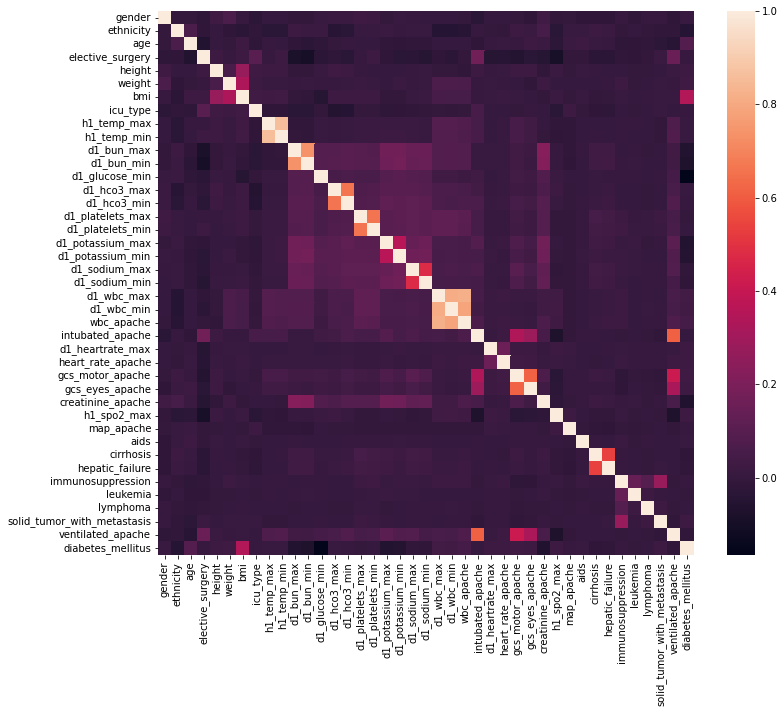

In [79]:
#heatmap for correlation
#Using Pearson Correlation
plt.figure(figsize=(12,10))
sns.heatmap(cleared_data.corr())
plt.show()

In [80]:
cleared_data.describe()

,gender,ethnicity,age,elective_surgery,height,weight,bmi,icu_type,h1_temp_max,h1_temp_min,...,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
count,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,...,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000
mean,1.457522,1.519852,28.951212,1.189404,26.903435,525.782286,10870.360224,3.259566,16.820286,18.222363,...,51.418853,1.000834,1.016713,1.013744,1.025379,1.007327,1.004080,1.020781,1.332243,1.644361
std,0.498196,1.229879,18.753197,0.391831,35.715903,503.572881,8838.404705,1.894218,26.425450,28.059571,...,36.173865,0.028863,0.128195,0.116429,0.157275,0.085284,0.063748,0.142651,0.471020,0.478709
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,13.000000,1.000000,7.000000,137.000000,2838.000000,2.000000,4.000000,4.000000,...,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,25.000000,1.000000,13.000000,382.000000,9030.000000,2.000000,8.000000,12.000000,...,41.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
75%,2.000000,1.000000,43.000000,1.000000,34.000000,767.000000,17205.000000,4.000000,19.000000,20.000000,...,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
max,2.000000,6.000000,76.000000,2.000000,395.000000,3071.000000,31617.000000,8.000000,325.000000,337.000000,...,171.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [82]:
X = cleared_data.iloc[:,0:40]
X

,gender,ethnicity,age,elective_surgery,height,weight,bmi,icu_type,h1_temp_max,h1_temp_min,...,h1_spo2_max,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2.0,1.0,3.0,2.0,3.0,3.0,3.0,1.0,3.0,3.0,...,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
3,1.0,1.0,4.0,1.0,4.0,4.0,4.0,2.0,4.0,4.0,...,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2.0,1.0,5.0,1.0,5.0,5.0,5.0,2.0,5.0,5.0,...,3.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79154,2.0,1.0,47.0,1.0,11.0,85.0,7071.0,2.0,2.0,2.0,...,7.0,12.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
79155,2.0,1.0,32.0,1.0,3.0,644.0,11899.0,3.0,7.0,8.0,...,1.0,28.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0
79156,1.0,2.0,24.0,1.0,24.0,55.0,23863.0,1.0,6.0,13.0,...,1.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
79157,1.0,1.0,9.0,1.0,22.0,86.0,4600.0,4.0,4.0,4.0,...,10.0,65.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0


In [40]:
#X.isna().sum()

#Dropping features with more than 50% values
'''null_values = data_frame.isna().sum()
data_frame.isna().mean().sort_values(ascending=False)'''

'null_values = data_frame.isna().sum()\ndata_frame.isna().mean().sort_values(ascending=False)'

In [85]:
y = cleared_data.iloc[:,40:]
y

,diabetes_mellitus
0,1.0
1,2.0
2,2.0
3,2.0
4,1.0
...,...
79154,2.0
79155,2.0
79156,2.0
79157,2.0


In [86]:
# one hot encoding
normalized_array = skl.preprocessing.normalize(X, norm='l2',  axis=1, copy=True, return_norm=False)

In [87]:
type(normalized_array)

numpy.ndarray

In [92]:
new_df = pd.DataFrame(data = normalized_array)

In [94]:
new_df.columns =  X.columns

# After normalization, all the values are now in the range of 0 to 1 and we can clearly observe that the values are converted from "int" type to "float" type

In [95]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79159 entries, 0 to 79158
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       79159 non-null  float64
 1   ethnicity                    79159 non-null  float64
 2   age                          79159 non-null  float64
 3   elective_surgery             79159 non-null  float64
 4   height                       79159 non-null  float64
 5   weight                       79159 non-null  float64
 6   bmi                          79159 non-null  float64
 7   icu_type                     79159 non-null  float64
 8   h1_temp_max                  79159 non-null  float64
 9   h1_temp_min                  79159 non-null  float64
 10  d1_bun_max                   79159 non-null  float64
 11  d1_bun_min                   79159 non-null  float64
 12  d1_glucose_min               79159 non-null  float64
 13  d1_hco3_max     

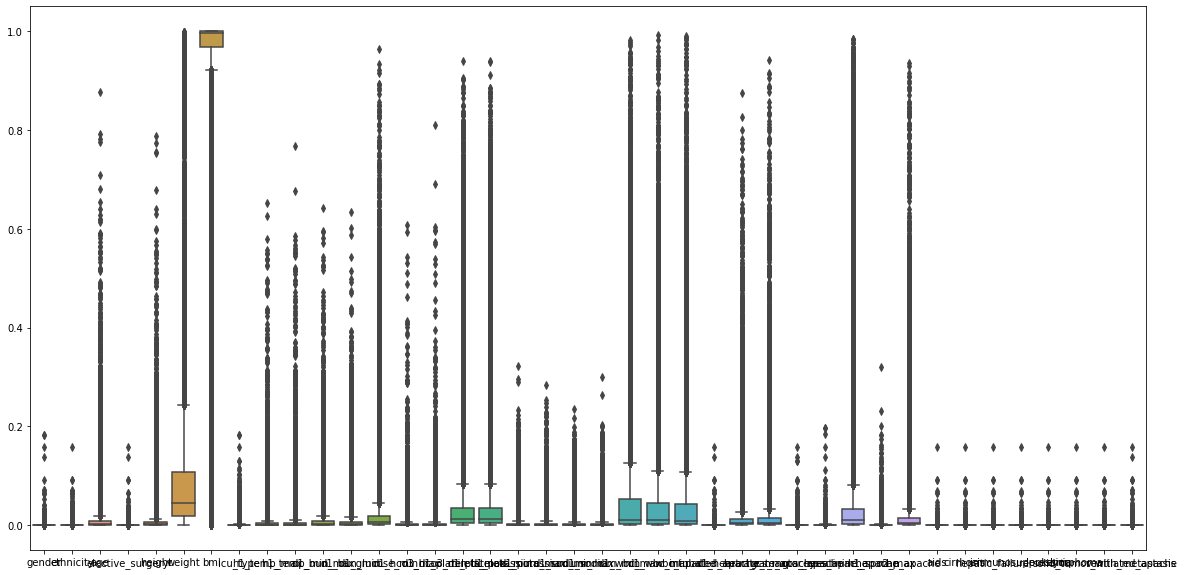

In [96]:
plt.figure(figsize=(20,10))
sns.boxplot(data = new_df)
plt.show()

<Figure size 1440x720 with 0 Axes>

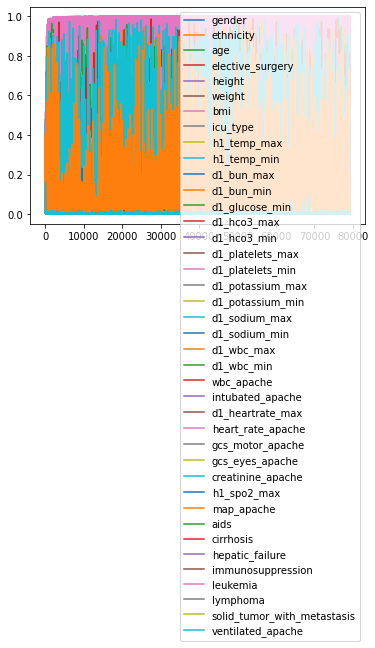

In [98]:
plt.figure(figsize=(20,10))
new_df.plot(kind = "line")
plt.show()

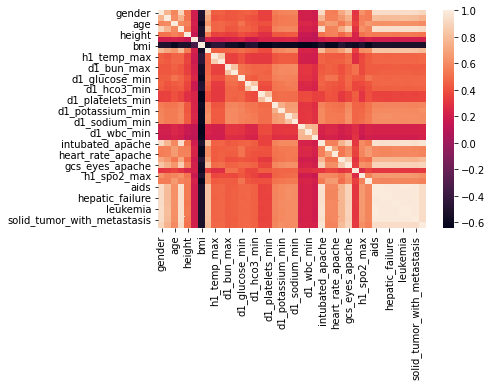

In [101]:
sns.heatmap(new_df.corr())


# **Model development**
1. Splitting the data into train and test.
2. Upsampling minor classes of training data if any
3. Classification

  3.1 Linear svc
  3.2 NaiveBayes
  3.3 stochastic gradient deescent
  3.4 knn classifier
  3.5 decision tree
  3.6 random forest
  3.7 accuracies calculation

4. Cross-validation

  4.1 Linear svc
  4.2 NaiveBayes
  4.3 stochastic gradient deescent
  4.4 knn classifier
  4.5 decision tree
  4.6 random forest
  4.7 accuracies calculation

5. Observations and confusion matrix
6. Performance metrics for classification
7. Clustering  

# Target class - 0 or 1 (bivariate analysis)
# For suppose - 0,1,2,3,4,5,6,7,8,9 (multi-class)

# while developing the model and splitting it, we have two options - holdout and cross-validation.

In [102]:
#Splitting the data

x = new_df
y

,diabetes_mellitus
0,1.0
1,2.0
2,2.0
3,2.0
4,1.0
...,...
79154,2.0
79155,2.0
79156,2.0
79157,2.0


In [104]:
# Splitting into training and testing
#splitting into train and test
from sklearn.model_selection import train_test_split

# Without stratification divide into first partition and test set.
train_X,test_X, train_y, test_y= train_test_split (x,y, test_size=0.2,random_state=10)

In [105]:
#classifier 1
#LinearSVC

from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(train_X, train_y);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [106]:
precision_recall_fscore_support(test_y, svc.predict(test_X), average='macro')

(0.613256019147965, 0.5446259014743184, 0.5104128136337565, None)

In [107]:
#classifier 2
#NaiveBayes

from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(train_X, train_y);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [108]:
precision_recall_fscore_support(test_y, naive_bayes.predict(test_X), average='macro')

(0.5683946408416111, 0.538728288591319, 0.5188251455803153, None)

In [109]:
#classifier 3
#stochastic gradient descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(train_X, train_y);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [110]:
precision_recall_fscore_support(test_y, sgd.predict(test_X), average='macro')

(0.6352808105065246, 0.5167177258842909, 0.43702118049673444, None)

In [111]:
#classifier 4
#knn classifier
from sklearn.neighbors import KNeighborsClassifier

clf_nn = KNeighborsClassifier(n_neighbors=5)
clf_knn=clf_nn
clf_knn.fit(train_X,train_y)
y_hat = clf_knn.predict(test_X)
y_hat


from sklearn.metrics import accuracy_score

#we can use the built in accuracy metrics in sklearn.
accuracy = accuracy_score(test_y, y_hat)
print('calculated accuracy:',accuracy)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


calculated accuracy: 0.6764148559878727


In [112]:
precision_recall_fscore_support(test_y, y_hat, average='macro')

(0.6436441791236233, 0.6298304607075765, 0.6333661072579084, None)

In [113]:
#classifier 5
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier

random_variable = RandomForestClassifier(max_depth=100)

random_variable.fit(train_X,train_y)

new_random_variable = random_variable.predict(test_X)

new_random_variable


from sklearn.metrics import accuracy_score

#we can use the built in accuracy metrics in sklearn.
accuracy2 = accuracy_score(test_y, new_random_variable)
print('Sklearn calculated accuracy:',accuracy2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Sklearn calculated accuracy: 0.756632137443153


In [114]:
precision_recall_fscore_support(test_y, new_random_variable, average='macro')

(0.7363798124519769, 0.7298123779552572, 0.732680664407879, None)

In [115]:
#classifier 6
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=100)

decision_tree.fit(train_X,train_y)

new_decision_tree = decision_tree.predict(test_X)

decision_tree


from sklearn.metrics import accuracy_score

#we can use the built in accuracy metrics in sklearn.
accuracy3 = accuracy_score(test_y, new_decision_tree)
print('Sklearn calculated accuracy:',accuracy3)

Sklearn calculated accuracy: 0.6848155634158666


In [116]:
precision_recall_fscore_support(test_y, new_decision_tree, average='macro')


(0.6581583117323246, 0.6576725380962224, 0.6579104931360464, None)

In [117]:
#scores
#comparison of classifiers

from sklearn.metrics import accuracy_score

classifiers = [svc, sgd,  naive_bayes ,clf_nn,decision_tree, random_variable]

# for each classifier get the accuracy score
scores = [accuracy_score(clf.predict(test_X), test_y) for clf in classifiers]
    
index = np.argmax(scores)

print(scores,2)

print(classifiers[index])
print("highest score",round(scores[index],2))
accuracy_percentage = (round(scores[index],2))*100
print("ACCURACY PERCENTAGE FOR CLASSIFIER ",accuracy_percentage,"%") 

[0.652033855482567, 0.6462228398180899, 0.6317584638706417, 0.6764148559878727, 0.6848155634158666, 0.756632137443153] 2
RandomForestClassifier(max_depth=100)
highest score 0.76
ACCURACY PERCENTAGE FOR CLASSIFIER  76.0 %


# Evaluation metrics and confusion matrix

In [118]:
#Confusion matrix
#confusion matrix
#lsvc
lsvc = LinearSVC()
lsvc=lsvc.fit(train_X, train_y)
lsvc.predict(test_X)
#gnb
gnb = GaussianNB()
gnb=gnb.fit(train_X, train_y)
gnb.predict(test_X)
#sgdc
sgdc = SGDClassifier()
sgdc=sgdc.fit(train_X, train_y)
sgdc.predict(test_X)
# knn
knn = KNeighborsClassifier(n_neighbors=10)
knn = knn.fit(train_X, train_y)
knn.predict(test_X)
#dt
dt = DecisionTreeClassifier(max_depth=100)
dt = dt.fit(train_X, train_y)
dt.predict(test_X)
# rfc
rfc = RandomForestClassifier(max_depth=100)
rfc = rfc.fit(train_X, train_y)
rfc.predict(test_X)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

array([1., 2., 1., ..., 1., 1., 2.])

In [119]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 14400x7200 with 0 Axes>

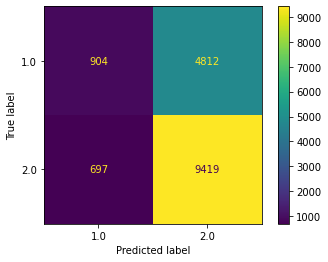

In [120]:
#plotting
plt.figure(figsize=(200,100))
plot_confusion_matrix(lsvc,test_X,test_y)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 14400x7200 with 0 Axes>

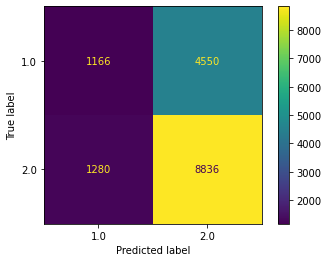

In [121]:
#plotting
plt.figure(figsize=(200,100))
plot_confusion_matrix(gnb,test_X,test_y)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 14400x7200 with 0 Axes>

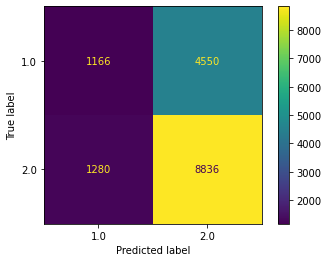

In [122]:
#plotting
plt.figure(figsize=(200,100))
plot_confusion_matrix(gnb,test_X,test_y)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 14400x7200 with 0 Axes>

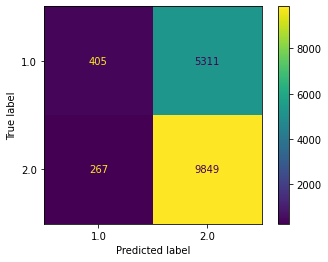

In [123]:
#plotting
plt.figure(figsize=(200,100))
plot_confusion_matrix(sgdc,test_X,test_y)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 14400x7200 with 0 Axes>

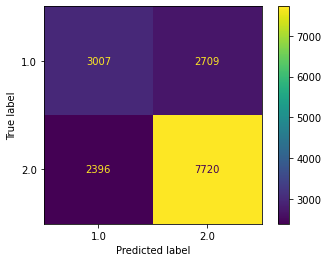

In [124]:
#plotting
plt.figure(figsize=(200,100))
plot_confusion_matrix(knn,test_X,test_y)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 14400x7200 with 0 Axes>

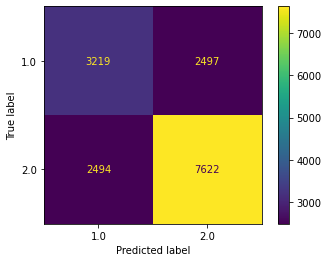

In [125]:
#plotting
plt.figure(figsize=(200,100))
plot_confusion_matrix(dt,test_X,test_y)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 14400x7200 with 0 Axes>

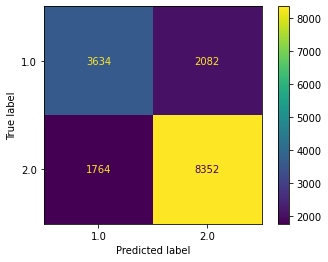

In [126]:
#plotting
plt.figure(figsize=(200,100))
plot_confusion_matrix(rfc,test_X,test_y)
plt.show()

In [132]:
cleared_data.to_csv("Diabetes.csv")

# Clustering

In [129]:
#the codes are taken from analytics vidhya and udemy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [130]:
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(cleared_data.iloc[:30863,:])
standard_df = pd.DataFrame(standard_df)
standard_df.describe()
dataset2 = standard_df
dataset2.columns = correlated_data.columns
# histograms of the variables
dataset2.hist(figsize=(30,20),color = "green")
pyplot.show()

NameError: ignored

In [ ]:
#t-sne dimensionality reduction
from sklearn.manifold import TSNE

label_data=df['diabetes_mellitus']

model = TSNE(n_components=2,random_state=0)

tsne_data =model.fit_transform(new_df)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
